<font size=+3 color="#3D3D3D"><center><b>EMOTION DETECTION</b></center></font>

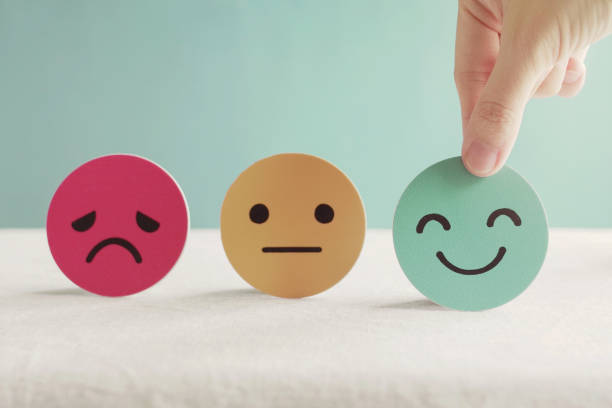

Emotion Detection and Recognition from text is a recent field of research that is closely related to Sentiment Analysis. Sentiment Analysis aims to detect positive, neutral, or negative feelings from text, whereas Emotion Analysis aims to detect and recognize types of feelings through the expression of texts, such as anger, disgust, fear, happiness, sadness, and surprise.

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Acknowledgements:</p>

**Special Thanks To Data.World :**

**This public domain dataset is collected from data.world platform. Thanks, data.world for releasing it under Public License.**

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Importing Libraries & Data:</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import re
import nltk
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from textblob import Word

import   missingno as msno
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('tweet_emotions.csv')
df1=df.copy()

In [3]:
df.head()

tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

In [4]:
df.tail()

tweet_id  sentiment  \
39995  1753918954    neutral   
39996  1753919001       love   
39997  1753919005       love   
39998  1753919043  happiness   
39999  1753919049       love   

                                                 content  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...  
39999  @mopedronin bullet train from tokyo    the gf ...

In [5]:
df.shape

(40000, 3)

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">EDA, Data Preprocessing & Text Cleaning:</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe(include='all')

tweet_id sentiment  \
count   4.000000e+04     40000   
unique           NaN        13   
top              NaN   neutral   
freq             NaN      8638   
mean    1.845184e+09       NaN   
std     1.188579e+08       NaN   
min     1.693956e+09       NaN   
25%     1.751431e+09       NaN   
50%     1.855443e+09       NaN   
75%     1.962781e+09       NaN   
max     1.966441e+09       NaN   

                                                  content  
count                                               40000  
unique                                              39827  
top     I just received a mothers day card from my lov...  
freq                                                   14  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [8]:
#Droping Tweet_id column Because it is no use in emotion Detection
df = df.drop(['tweet_id'],axis=1)
df.head()

sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...

sentiment


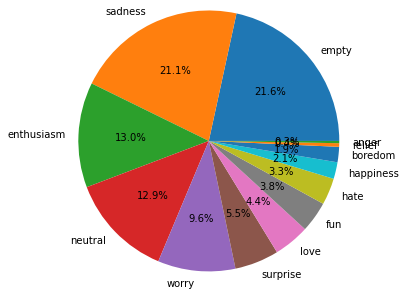

In [9]:
print('sentiment')
lst=list(df['sentiment'].value_counts())
lbs=list(df['sentiment'].unique())
plt.pie(lst,labels=lbs,radius=1.5,autopct="%1.1f%%")
plt.show()

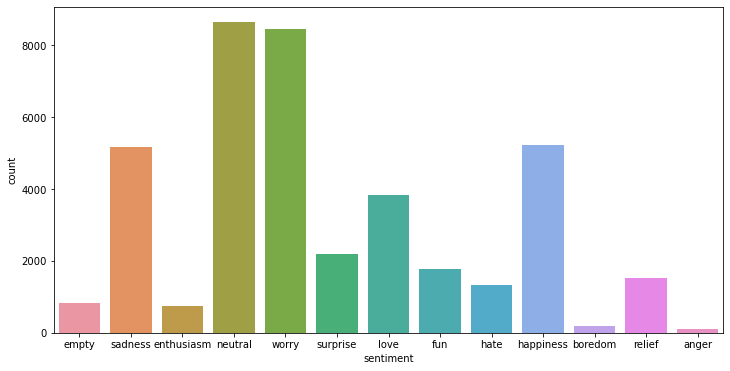

In [10]:
plt.figure(figsize=(12,6))
sn.countplot(x='sentiment',data=df,width=0.8)
plt.show()

In [11]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [12]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [13]:
df['sentiment'].value_counts().count()

13

In [14]:
df.duplicated().sum()

91

In [15]:
df.drop_duplicates(inplace=True)
df=df.reset_index(0,50000)

In [16]:
df['content'].duplicated().sum()

82

In [17]:
df['content'].value_counts()[1:60]

Happy Mother's Day!                                                                                                                         4
Happy Mothers Day                                                                                                                           4
http://snipurl.com/hq0n1 Just printed my mom an Amazon gift card  for Happy Mothers Day talk about last minute.                             4
@DougieMcfly Haha dude, we have the same b-date :p I'll wish u ur b-day the 3oth November. I'll also turn 16  Can u reply to me please ?    3
happy mothers day                                                                                                                           3
happy mother's day                                                                                                                          3
HAPPY MOTHERS DAY!                                                                                                                          3
Headac

In [18]:
df['content'].value_counts()[59:70]

0                                                                                                                                        2
@ThinkReferrals oh man I'm jealous!  just got it?                                                                                        2
Happy Mother's Day                                                                                                                       2
@Nawarii22 ur welcome  u finished ur speech (typed it and written notes)                                                                 1
@dirkstanley also: is there a strategic IT plan that maps to the bus strategic needs, that deliver value over time? No more waterfall    1
@azmomofmanyhats @rocknrod @gailelaine @sarahstanley  Good morning to you !  Its so pretty outside today                                 1
@GlastoWatch @TheHwicceMan @cakey  i have been getting porn ones as i mentioned - all these girls seem to be at a loss what to do!       1
@HilzFuld haha this tripped

In [19]:
df.isnull().sum()

sentiment    0
content      0
dtype: int64

In [20]:
df[df['content']=='0']

sentiment content
340       empty       0
15023   neutral       0

<p style="font-size:25px; font-family:verdana; line-height: 1.7em">Analyzing Sentiment Wise Texts :</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing Empty Emotion text :</p>
    

In [21]:
df_empty=df[df['sentiment']=='empty']

In [22]:
df_empty.shape

(827, 2)

In [23]:
df_empty=df_empty.reset_index(0,827)

In [24]:
df_empty['content'].duplicated().sum()

0

In [25]:
df_empty.content[0]

'@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [26]:
df_empty.content[1]

'@creyes middle school and elem. High schools will remain open for those who need credits to graduate. Cali is broken'

In [27]:
df_empty.content[5]

"@DymeDiva23 Nite. Now I'm up n bored as opposed to almost sleep frm b 4"

In [28]:
df_empty.content[700]

'@purplefrogcat'

In [29]:
df_empty.content[501]

"@cathjenkin when I see all the moms' on twitter and their tweets, I know its gonna be worth ir"

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing neutral Emotion text :</p>


In [30]:
df_neutral=df[df['sentiment']=='neutral']
df_neutral=df_neutral.reset_index(0,8617)

In [31]:
df_neutral.shape

(8617, 2)

In [32]:
df_neutral.head()

sentiment                                            content
0   neutral  @dannycastillo We want to trade with someone w...
1   neutral                                   cant fall asleep
2   neutral  No Topic Maps talks at the Balisage Markup Con...
3   neutral                          @cynthia_123 i cant sleep
4   neutral                    I missed the bl***y bus!!!!!!!!

In [33]:
df_neutral['content'].duplicated().sum()

0

In [34]:
df_neutral.content[0]

'@dannycastillo We want to trade with someone who has Houston tickets, but no one will.'

In [35]:
df_neutral.content[74]

'@passingcarss i wont have time to buy  and i need a new binder pa'

In [36]:
df_neutral.content[501]

'@Jay5920 leave Fraser alone'

In [37]:
df_neutral.content[740]

'leaving tomorrow'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing Worry Emotion text :</p>


In [38]:
df_worry=df[df['sentiment']=='worry']
df_worry=df_worry.reset_index(0,8452)

In [39]:
df_worry.head()

sentiment                                            content
0     worry  Re-pinging @ghostridah14: why didn't you go to...
1     worry               Hmmm. http://www.djhero.com/ is down
2     worry                            Choked on her retainers
3     worry  @PerezHilton lady gaga tweeted about not being...
4     worry  @raaaaaaek oh too bad! I hope it gets better. ...

In [40]:
df_worry.content[7400]

'@verwon and now I am starting to feel really old.'

In [41]:
df_worry.content[5100]

"@jillvee If it keeps up like this I'm soon not going to have anything to blow the liquids OUT of!"

In [42]:
df_worry.content[458]

'@busays12 dont undrstand malaysian busays.just english,tagalog at waray only'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing happiness Emotion text :</p>


In [43]:
df_happiness=df[df['sentiment']=='happiness']
df_happiness=df_happiness.reset_index(0,9000)

In [44]:
df_happiness.shape

(5194, 2)

In [45]:
df_happiness.head()

sentiment                                            content
0  happiness  mmm much better day... so far! it's still quit...
1  happiness  So great to see Oin &amp; Cynthia.  So happy. ...
2  happiness  @havingmysay  dude, that is my favorite sandwi...
3  happiness  Need to pack for CALI CALI! Cannot waittt! Thi...
4  happiness  took a math test today. The day before the tes...

In [46]:
df_happiness.content[0]

"mmm much better day... so far! it's still quite early. last day of #uds"

In [47]:
df_happiness.content[55]

'Is dreading going to work  BUT....its friiiiiday!! whoop!!!'

In [48]:
df_happiness.content[95]

'@hilsatlvsonline Thanks for the tip! Unfortunately a major crash in my https site, just as ExtPlorer'

In [49]:
df_happiness.content[950]

'@wickedgirl24 glad you like it'

In [50]:
df_happiness.content[5000]

"Oh, I've just watched the third episode of JONAS, it's awesome."

In [51]:
df_happiness.content[4500]

'@light_bikes sounds good to me  hahaha'

In [52]:
df.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing sadness Emotion text :</p>


In [53]:
df_sadness=df[df['sentiment']=='sadness']
df_sadness=df_sadness.reset_index(0,9000)

In [54]:
df_sadness.shape

(5160, 2)

In [55]:
df_sadness.head()

sentiment                                            content
0   sadness  Layin n bed with a headache  ughhhh...waitin o...
1   sadness                Funeral ceremony...gloomy friday...
2   sadness  I should be sleep, but im not! thinking about ...
3   sadness            @charviray Charlene my love. I miss you
4   sadness         @kelcouch I'm sorry  at least it's Friday?

In [56]:
df_sadness.content[0]

'Layin n bed with a headache  ughhhh...waitin on your call...'

In [57]:


df_sadness.content[52]

'is a bad friend'

In [58]:
df_sadness.content[57]

"@fairyfroggie But yeah...I'm sad about my &quot;Ravenclaw&quot; account. I love that account to bits."

In [59]:
df_sadness.content[59]

'sometimes i wish things could go back to the way they were the beginning of last summer'

In [60]:
df_sadness.content[200]

'@maliciousmandy1 Adam Samberg + new moon trailor = good evening. Too bad my cable is off as of friday'

In [61]:
df_sadness.content[500]

"damn i missed @xsparkage's blogtv  i hope it was funsies?"

In [62]:
df_sadness.content[4500]

"@Gjerninger Are you sure you want to know?  It's http://bit.ly/AUuAC - it makes me want to run. In other news: Happy Star Wars Day!"

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing enthusiasm Emotion text :</p>


In [63]:
df_enthusiasm=df[df['sentiment']=='enthusiasm']
df_enthusiasm=df_enthusiasm.reset_index(0,9000)

In [64]:
df_enthusiasm.shape

(759, 2)

In [65]:
df_enthusiasm.head()

sentiment                                            content
0  enthusiasm               wants to hang out with friends SOON!
1  enthusiasm  bed...sorta. today was good, sara has strep th...
2  enthusiasm                                I want another tatt
3  enthusiasm         So, I need to make a lot of money tomorrow
4  enthusiasm  @lilxamyx08 i know ridiculous! we never got to...

In [66]:
df_enthusiasm.content[0]

'wants to hang out with friends SOON!'

In [67]:
df_enthusiasm.content[54]

'@garrulous_gal of course! *cough* I mean, no, 1.5 hours extra testing and debugging time'

In [68]:
df_enthusiasm.content[540]

'@chickieleighc That was nice. I Just ordered my mom her gift from me and my sister.   Something different and unexpected.'

In [69]:
df_enthusiasm.content[755]

"CAN'T SLEEP TONIGHT . Oh see ya! Bye"

In [70]:
df_enthusiasm.content[452]

"'k, going to curl up and watch random mind-numbing DVD in hopes that rest will cure runny nose. Night folks"

In [71]:
df_enthusiasm.content[444]

'@kristianc count me in'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing surprise Emotion text :</p>


In [72]:
df_surprise=df[df['sentiment']=='surprise']
df_surprise=df_surprise.reset_index(0,9000)

In [73]:
df_surprise.shape

(2187, 2)

In [74]:
df_surprise.head()

sentiment                                            content
0  surprise                                       Got the news
1  surprise  2 days of this month left, and I only have 400...
2  surprise  @Bern_morley where are you? In Bris? I can't h...
3  surprise  bec vs fat food   --- winner = fat food  but n...
4  surprise  I had a dream about a pretty pretty beach and ...

In [75]:
df_surprise.content[0]

'Got the news'

In [76]:
df_surprise.content[456]

"@crystaaale dude, that's eff'ed up. LOL @ chris browning you. We live so far apart and Im afraid to fly"

In [77]:
df_surprise.content[1289]

'Waiting for the last movie to finish then am test screening Ghost of Girlfriends Past, glass of wine and lolly bag in hand, yay!'

In [78]:
df_surprise.content[2179]

'@TwistedHelen her son is 7 and captured it outside...THANK GOD I HAVE A LITTLE GIRL'

In [79]:
df_surprise.content[1579]

"Catching up on 2 weeks of LOST and Grey's!!    House is quiet again."

In [80]:
df_surprise.content[2079]

'@TiffanyDow well I hovered over the button LOL NOT - sleep well Tiff and you are welcome'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing  love Emotion text :</p>


In [81]:
df_love=df[df['sentiment']=='love']
df_love=df_love.reset_index(0,9000)

In [82]:
df_love.shape

(3801, 2)

In [83]:
df_love.head()

sentiment                                            content
0      love                               @annarosekerr agreed
1      love  @RobertF3 correct! I ADORE him. I just plucked...
2      love  @freepbx sounds good. Appreciate the suggestio...
3      love  Pats in philly at 2 am. I love it. Mmm cheeses...
4      love  @NisforNeemah thanks neemah. I'm gonna be sooo...

In [84]:
df_love.content[0]

'@annarosekerr agreed'

In [85]:
df_love.content[545]

'cant wait to get home. i hate my job'

In [86]:
df_love.content[586]

'@ShaunCallahan wowzers! thanks! bang bang misses you on the dance floor'

In [87]:
df_love.content[486]

'http://bit.ly/dIQF3 I hope some day my mom will get this message!'

In [88]:
df_love.content[886]

"Thanks to all the new followers  Well, I went to a strip club tonight and its 4am so I'll follow you tomorrow. Much love."

In [89]:
df_love.content[3000]

"I'm emailing my best friend Deanna with my yahoo account. Emailing is FUN.  &lt;3"

In [90]:
df_love.content[3386]

'Happy Mothers Day!'

In [91]:
df_love.content[2086]

"@TaeJun stellar  happy ma's day to them"

In [92]:
df_love.content[786]

'I am so sorry i fell asleep first'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing  fun Emotion text :</p>


In [93]:
df_fun=df[df['sentiment']=='fun']
df_fun=df_fun.reset_index(0,9000)

In [94]:
df_fun.shape

(1776, 2)

In [95]:
df_fun.head()

sentiment                                            content
0       fun  Wondering why I'm awake at 7am,writing a new s...
1       fun  @DavidArchie &lt;3 your gonna be the first  tw...
2       fun   RIP leonardo. You were a great mini fiddler crab
3       fun  @IdleThumbs Up is out?  I didn't get the memo ...
4       fun  @relly1  OMG Ur alive!!! LOL  2day has gone so...

In [96]:
df_fun.content[786]

'@BMartha hello there!'

In [97]:
df_fun.content[1767]

"@mneylon I'm doing an experiement"

In [98]:
df_fun.content[867]

'@PushPlayCJ hey  yall were amazing at bamboozle! thanks for stopping to take apicture on saturday.. seemed like you were in a rush though!'

In [99]:
df_fun.content[467]

'All zombie songs are now dedicated to @HAMMER32  ? http://blip.fm/~5jbib'

In [100]:
df_fun.content[167]

'@misskitty05 i wish i had a 12hr nap!!  lets talk rachel into getting one of these now.. lol'

In [101]:
df_fun.content[87]

'Travel trade stalwart, David Steele of City Cruises marks his retirement with a Thames Cruise Party tonight - press day means I miss out'

In [102]:
df_fun.content[367]

"it's ridiculously warm in bed"

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing hate Emotion text :</p>


In [103]:
df_hate=df[df['sentiment']=='hate']
df_hate=df_hate.reset_index(0,9000)

In [104]:
df_hate.shape

(1323, 2)

In [105]:
df_hate.head()

sentiment                                            content
0      hate  It is so annoying when she starts typing on he...
1      hate  dammit! hulu desktop has totally screwed up my...
2      hate  @ cayogial i wanted to come to BZ this summer ...
3      hate                @mrgenius23 You win ... SIGH Rakeem
4      hate                      @soviet_star Damn, that sucks

In [106]:
df_hate.content[1]

"dammit! hulu desktop has totally screwed up my ability to talk to a particular port on one of our dev servers. so i can't watch and code"

In [107]:
df_hate.content[75]

"@Kikirowr Downside though is that you're breaking the thread."

In [108]:
df_hate.content[561]

'my brother is irritating. and not just bc he takes &amp; wears my clothes without asking. i want to punch him violently for shit he does.'

In [109]:
df_hate.content[1200]

"Sometimes I hate myself, but that's normal so I don't worry bout it"

In [110]:
df_hate.content[1100]

"@LushLtd Well aren't you just the kindest people in the world  Unfortunately, I have no such enquiries!"

In [111]:
df_hate.content[56]

'Its so Fucking hot! Damn no air conditioning.'

In [112]:
df_hate.content[205]

"I can't think of a way to express in 140 chars how disspointed I am with the advertising on Lifehacker's Why I Didn't Buy A Mac article."

In [113]:
df_hate.content[1154]

"It's Monday, and I am still cleaning up the mess from Thursday night's storm.  Like I wasn't busy enough this week!"


<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing boredom Emotion text :</p>


In [114]:
df_boredom=df[df['sentiment']=='boredom']
df_boredom=df_boredom.reset_index(0,9000)

In [115]:
df_boredom.shape

(179, 2)

In [116]:
df_boredom.head()

sentiment                                            content
0   boredom                                       i'm so tired
1   boredom                            Waiting in line @ tryst
2   boredom             why did i agree to work a double shift
3   boredom  is really, really bored... I guess I will go t...
4   boredom                       So deep its priecing my soul

In [117]:
df_boredom.content[5]

"THIS TWITTER SHIT BORES ME, NOW I C Y I HAVEN'T BEEN ON HERE IN A MONTH"

In [118]:
df_boredom.content[170]

'today was boring...harry potter ftw'

In [119]:
df_boredom.content[165]

'@PurpleFoodie yeah...I hope it turns out... 20 more minutes!'

In [120]:
df_boredom.content[74]

'Eastenders is always so grim'

In [121]:
df_boredom.content[45]

'The gigantic initial inertial to get oneself to work after a deadline'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing relief Emotion text :</p>


In [122]:
df_relif=df[df['sentiment']=='relief']
df_relif=df_relif.reset_index(0,9000)

In [123]:
df_relif.shape

(1524, 2)

In [124]:
df_relif.head()

sentiment                                            content
0    relief                                        I'm at work
1    relief  is done painting all the bedroom furniture, I ...
2    relief  Scary lightning and thunder  I'm glad it's ove...
3    relief                     is home.  safely... but hungry
4    relief  just finished 8 hours of Texas Life Insurance ...

In [125]:
df_relif.content[10]

"@colstewart You're cycling tho' that's good. Healthy eating  Healthy and eating are a contradiction in terms."

In [126]:
df_relif.content[100]

"It's Friday, but not the most pleasant ones  waaaaaay to much work..."

In [127]:
df_relif.content[101]

"@grizzlycullen it was days yesterday and probably today that I wish I had taken the top off my jeep.  I need help haha. IT'S FRICKEN HOT"

In [128]:
df_relif.content[1001]

"@ff3725 She must be able to tell we're reprobates, despite your endorsement. She sounds pretty smart!"

In [129]:
df_relif.content[511]

'is having a well-deserved break today..NO PHONE CALLS, NO EMAILS..only plenty of catch up movies to doooooo'

In [130]:
df_relif.content[1311]

"FINALLY finished studying, 7 pages of double sided notes later... off to cook tea and dessert now. Happy Mother's Day!!"

In [131]:
df_relif.content[1511]

'@IronLantern Yup. And pulse.im is withstanding the hits so far'

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Analyzing anger Emotion text :</p>


In [132]:
df_anger=df[df['sentiment']=='anger']
df_anger=df_anger.reset_index(0,9000)

In [133]:
df_anger.shape

(110, 2)

In [134]:
df_anger.head()

sentiment                                            content
0     anger                              fuckin'm transtelecom
1     anger                   Working   But it's Fridaaaayyyyy
2     anger                         Packing  I don't like it..
3     anger  I tried to dye my hair and all i got was a blo...
4     anger  &quot;locked up abroad&quot; makes bein half b...

In [135]:
df_anger.content[100]

'had a kickass day full of Seaworld, retarded 15 year old guys, and X-Men Origins. Win day?'

In [136]:
df_anger.content[10]

'lost all my files since high school.'

In [137]:
df_anger.content[57]

"Gah, I sprained my LEFT ankle... Just after I got over the torn ligament for my right foot. Looks like it's back to walking with a cane"

In [138]:
df_anger.content[75]

'Apperently ea knows my copy of the sims 3 is not legit and is upset'

In [139]:
df.shape

(39909, 2)

In [140]:
# Word counting per tweet :
def Word_count(i):
    rp=re.sub('[^a-zA-Z]'," ",df['content'][i]) 
    rp=rp.split()
    rp=" ".join(rp)
    val=nltk.word_tokenize(str(rp))
    return len(val)

In [141]:
# Word counting per tweet before removing Stopwords :
df['Words_count']=range(0,39909)
for i in range(len(df['content'])):
    df['Words_count'][i]= Word_count(i)
    

In [142]:
df

sentiment                                            content  \
0           empty  @tiffanylue i know  i was listenin to bad habi...   
1         sadness  Layin n bed with a headache  ughhhh...waitin o...   
2         sadness                Funeral ceremony...gloomy friday...   
3      enthusiasm               wants to hang out with friends SOON!   
4         neutral  @dannycastillo We want to trade with someone w...   
...           ...                                                ...   
39904     neutral                                   @JohnLloydTaylor   
39905        love                     Happy Mothers Day  All my love   
39906        love  Happy Mother's Day to all the mommies out ther...   
39907   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39908        love  @mopedronin bullet train from tokyo    the gf ...   

       Words_count  
0               17  
1               11  
2                4  
3                7  
4               15  
...            ...  
39904            1  
39905            6  
39906           27  
39907           22  
39908           19  

[39909 rows x 3 columns]

<div style="font-size:20px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Word cloud analysis</h3>
</div>

In [143]:
from wordcloud import WordCloud
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(word)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(genre):
    s = ""
    for row_index,row in df.iterrows():
        if(row['sentiment'] == genre):
            s+=(row['content']+' ')
    return s

neutral


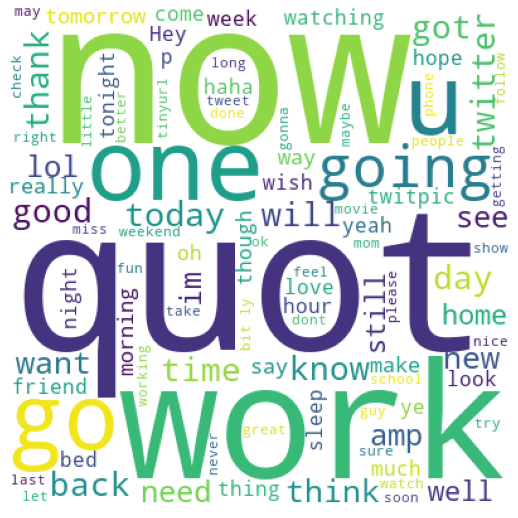

worry


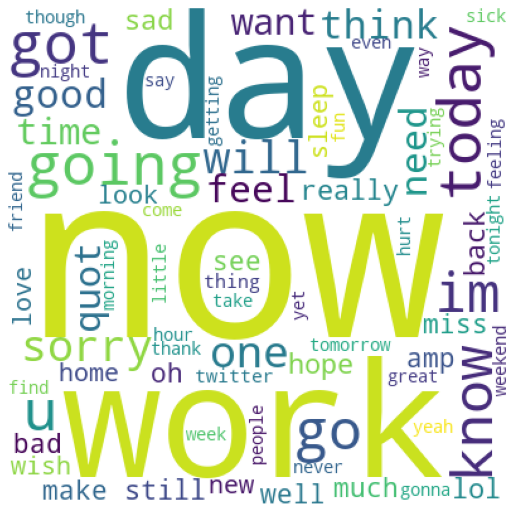

happiness


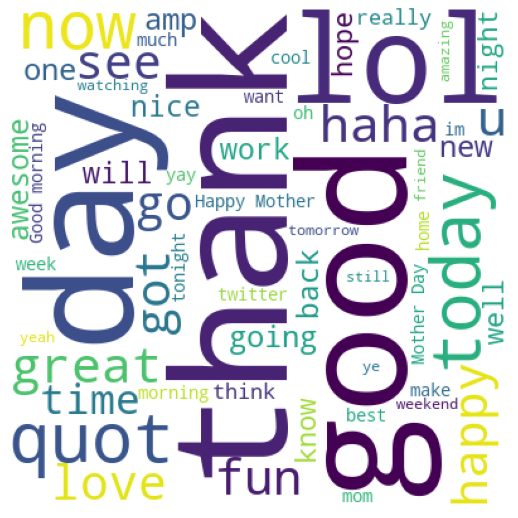

sadness


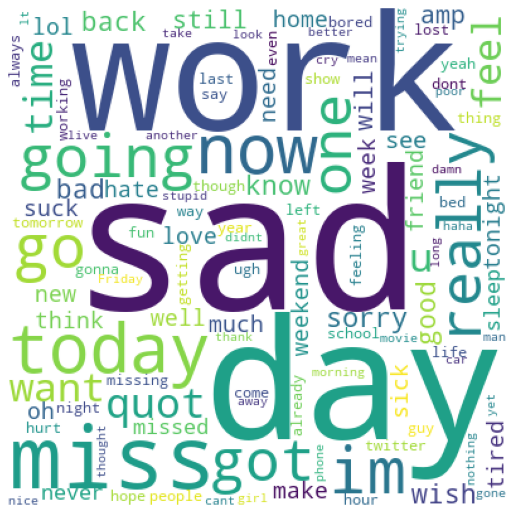

love


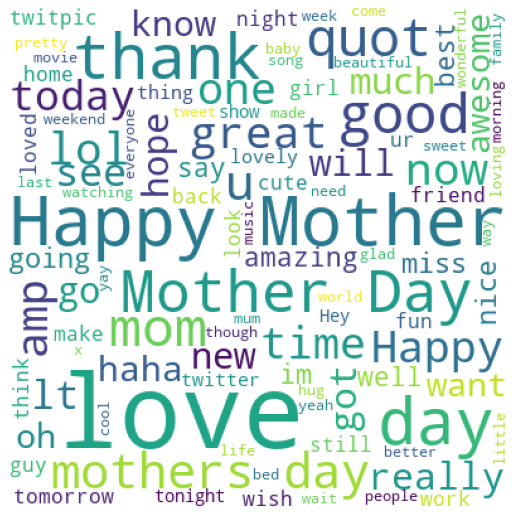

surprise


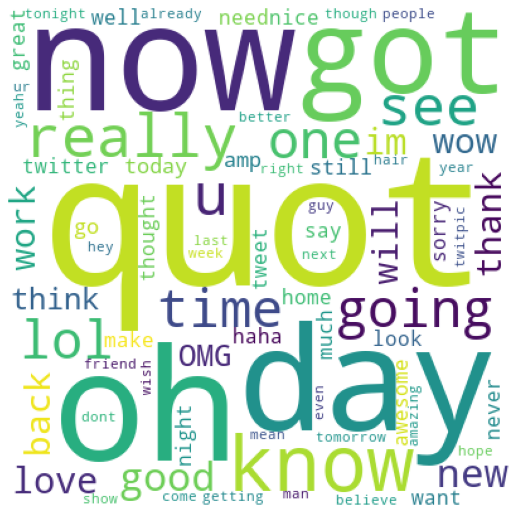

fun


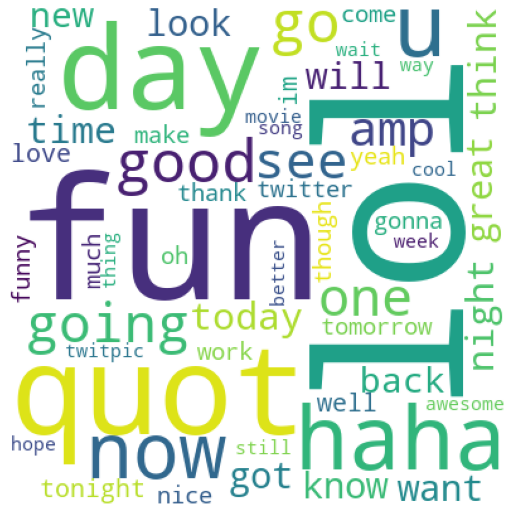

relief


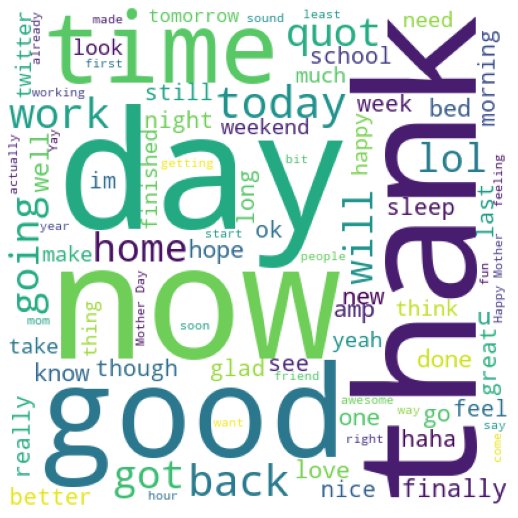

hate


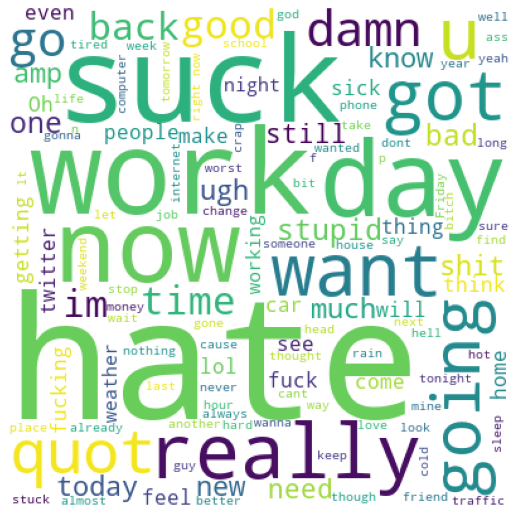

empty


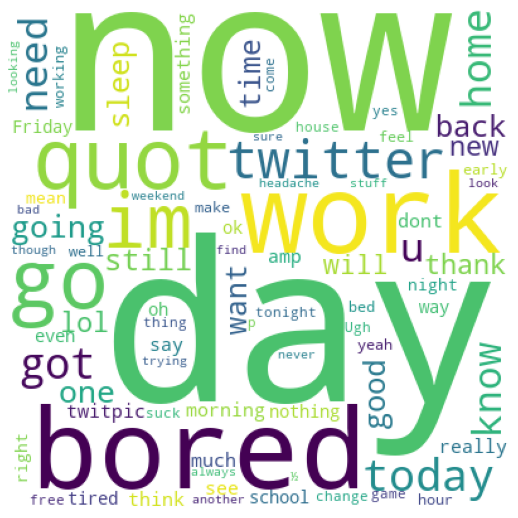

enthusiasm


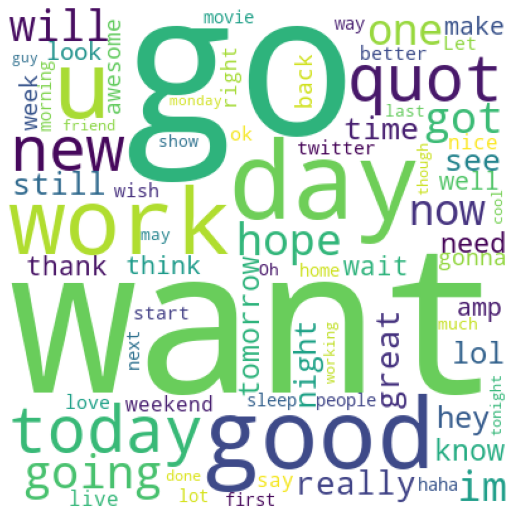

boredom


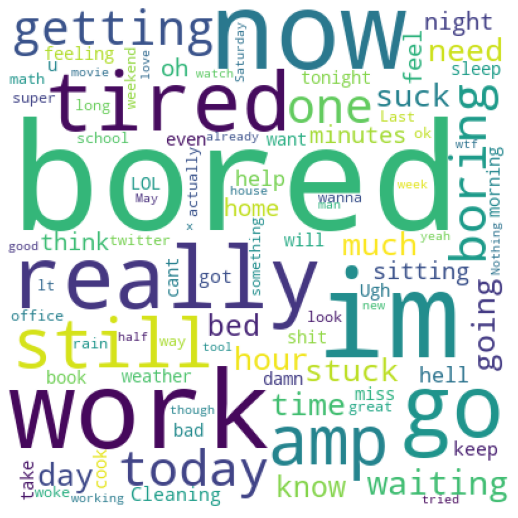

anger


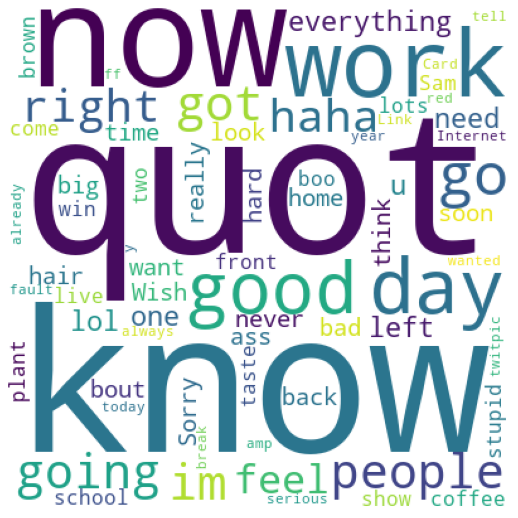

In [144]:

genre = ['neutral','worry','happiness','sadness','love','surprise','fun',
                                'relief','hate','empty','enthusiasm','boredom','anger']
for Genre in genre:
    word = make_string(Genre)
    print_wordCloud(Genre,word)

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Text Cleaning :</p>


In [145]:
#list of stopw in English
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [146]:
#Cleaning Text using Corpus.
df['Cleaned_Content']=range(0,len(df['content']))
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['content'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[word for word in rp if not word in set(stopwords.words('english'))]
    rp= " ".join(rp)
    df['Cleaned_Content'][i]=rp
    

In [147]:
df.head()

sentiment                                            content  Words_count  \
0       empty  @tiffanylue i know  i was listenin to bad habi...           17   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...           11   
2     sadness                Funeral ceremony...gloomy friday...            4   
3  enthusiasm               wants to hang out with friends SOON!            7   
4     neutral  @dannycastillo We want to trade with someone w...           15   

                                     Cleaned_Content  
0  tiffanylue know listenin bad habit earlier sta...  
1            layin n bed headache ughhhh waitin call  
2                     funeral ceremony gloomy friday  
3                            wants hang friends soon  
4  dannycastillo want trade someone houston ticke...

In [148]:
# Word counting per tweet :
def Word_count(i):
    rp=re.sub('[^a-zA-Z]'," ",df['Cleaned_Content'][i]) 
    rp=rp.split()
    rp=" ".join(rp)
    val=nltk.word_tokenize(str(rp))
    return len(val)

In [149]:
# Word counting per tweet after removing Stopwords :
df['Cleaned_Content_count']=range(0,39909)
for i in range(len(df['content'])):
    df['Cleaned_Content_count'][i]= Word_count(i)


In [150]:
from autocorrect import spell
for i in range(len(df.Cleaned_Content)):
    df.Cleaned_Content[i]=spell(df.Cleaned_Content[i])

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


In [151]:
df.head()

sentiment                                            content  Words_count  \
0       empty  @tiffanylue i know  i was listenin to bad habi...           17   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...           11   
2     sadness                Funeral ceremony...gloomy friday...            4   
3  enthusiasm               wants to hang out with friends SOON!            7   
4     neutral  @dannycastillo We want to trade with someone w...           15   

                                     Cleaned_Content  Cleaned_Content_count  
0  tiffanylue know listening bad habit earlier st...                      9  
1           latin n bed headache ughhhh waiting call                      7  
2                     funeral ceremony gloomy friday                      4  
3                            wants hang friends soon                      4  
4  dannycastillo want trade someone houston ticke...                      7

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Stemming:</p>


In [152]:
#Stemming
from nltk.stem import PorterStemmer

df['Cleaned_Content'] = df['Cleaned_Content'].apply(lambda x: " ".join([Word(word).stem() for word in x.split()]))


In [153]:
df

sentiment                                            content  \
0           empty  @tiffanylue i know  i was listenin to bad habi...   
1         sadness  Layin n bed with a headache  ughhhh...waitin o...   
2         sadness                Funeral ceremony...gloomy friday...   
3      enthusiasm               wants to hang out with friends SOON!   
4         neutral  @dannycastillo We want to trade with someone w...   
...           ...                                                ...   
39904     neutral                                   @JohnLloydTaylor   
39905        love                     Happy Mothers Day  All my love   
39906        love  Happy Mother's Day to all the mommies out ther...   
39907   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39908        love  @mopedronin bullet train from tokyo    the gf ...   

       Words_count                                    Cleaned_Content  \
0               17  tiffanylu know listen bad habit earlier start ...   
1               11               latin n bed headach ughhhh wait call   
2                4                       funer ceremoni gloomi friday   
3                7                              want hang friend soon   
4               15  dannycastillo want trade someon houston ticket...   
...            ...                                                ...   
39904            1                                    johnlloydtaylor   
39905            6                              happi mother day love   
39906           27  happi mother day mummi woman man long comma so...   
39907           22  niariley wasp beauti follow peep new hit singl...   
39908           19  mopedronin bullet train tokyo gf visit japan s...   

       Cleaned_Content_count  
0                          9  
1                          7  
2                          4  
3                          4  
4                          7  
...                      ...  
39904                      1  
39905                      4  
39906                     10  
39907                     16  
39908                     13  

[39909 rows x 5 columns]

# Splliting The data

In [154]:
X=df['Cleaned_Content']
y=df['sentiment']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<p style="font-size:30px; font-family:verdana; line-height: 1.7em">Vectorization :</p>


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train).toarray()
x_test = tf.transform(x_test).toarray()


In [156]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
y_train = L.fit_transform(y_train)
y_test=L.transform(y_test)

In [157]:
x_train.shape,y_train.shape

((27936, 21930), (27936,))

# Applying Machine Learning

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


import time

In [159]:
models = [LogisticRegression(),BernoulliNB(),MultinomialNB(),KNeighborsClassifier()]

In [160]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []

In [161]:

for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

LogisticRegression Successfully Trained
BernoulliNB Successfully Trained
MultinomialNB Successfully Trained
KNeighborsClassifier Successfully Trained


In [162]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

Name  Accuracy  Precision_score  Recall_score  F1_score  \
0    LogisticRegression  0.343690         0.170853      0.318156  0.169232   
1           BernoulliNB  0.309363         0.125533      0.140907  0.108283   
2         MultinomialNB  0.291072         0.116733      0.135725  0.098226   
3  KNeighborsClassifier  0.234695         0.090942      0.164304  0.066141   

    Time Taken  
0   299.180742  
1   112.379590  
2    21.863914  
3  1162.842140

In [163]:
df

sentiment                                            content  \
0           empty  @tiffanylue i know  i was listenin to bad habi...   
1         sadness  Layin n bed with a headache  ughhhh...waitin o...   
2         sadness                Funeral ceremony...gloomy friday...   
3      enthusiasm               wants to hang out with friends SOON!   
4         neutral  @dannycastillo We want to trade with someone w...   
...           ...                                                ...   
39904     neutral                                   @JohnLloydTaylor   
39905        love                     Happy Mothers Day  All my love   
39906        love  Happy Mother's Day to all the mommies out ther...   
39907   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39908        love  @mopedronin bullet train from tokyo    the gf ...   

       Words_count                                    Cleaned_Content  \
0               17  tiffanylu know listen bad habit earlier start ...   
1               11               latin n bed headach ughhhh wait call   
2                4                       funer ceremoni gloomi friday   
3                7                              want hang friend soon   
4               15  dannycastillo want trade someon houston ticket...   
...            ...                                                ...   
39904            1                                    johnlloydtaylor   
39905            6                              happi mother day love   
39906           27  happi mother day mummi woman man long comma so...   
39907           22  niariley wasp beauti follow peep new hit singl...   
39908           19  mopedronin bullet train tokyo gf visit japan s...   

       Cleaned_Content_count  
0                          9  
1                          7  
2                          4  
3                          4  
4                          7  
...                      ...  
39904                      1  
39905                      4  
39906                     10  
39907                     16  
39908                     13  

[39909 rows x 5 columns]